In [16]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_total = pd.read_csv('https://raw.githubusercontent.com/CatitaR/CapstoneProject_ADD/main/data/processed/base_analisis.csv')
data_rm = pd.read_csv('https://raw.githubusercontent.com/CatitaR/CapstoneProject_ADD/main/data/processed/base_analisis_rm.csv')
data_otras = pd.read_csv('https://raw.githubusercontent.com/CatitaR/CapstoneProject_ADD/main/data/processed/base_analisis_otras.csv')

In [7]:
data_total[['tasa_def','prop_rural','etnia','ingreso','tasa_denuncias']].corr()

,tasa_def,prop_rural,etnia,ingreso,tasa_denuncias
tasa_def,1.000000,0.333822,0.273611,-0.265321,-0.155897
prop_rural,0.333822,1.000000,0.311531,-0.383921,-0.291506
etnia,0.273611,0.311531,1.000000,-0.137925,-0.174545
ingreso,-0.265321,-0.383921,-0.137925,1.000000,0.312979
tasa_denuncias,-0.155897,-0.291506,-0.174545,0.312979,1.000000


In [8]:
data_rm[['tasa_def','prop_rural','etnia','ingreso','tasa_denuncias']].corr()

,tasa_def,prop_rural,etnia,ingreso,tasa_denuncias
tasa_def,1.000000,0.088934,0.386770,-0.523736,-0.077334
prop_rural,0.088934,1.000000,-0.125432,-0.217116,-0.232757
etnia,0.386770,-0.125432,1.000000,-0.427525,-0.172136
ingreso,-0.523736,-0.217116,-0.427525,1.000000,0.213438
tasa_denuncias,-0.077334,-0.232757,-0.172136,0.213438,1.000000


In [9]:
data_otras[['tasa_def','prop_rural','etnia','ingreso','tasa_denuncias']].corr()

,tasa_def,prop_rural,etnia,ingreso,tasa_denuncias
tasa_def,1.000000,0.286528,0.237881,-0.225657,-0.126749
prop_rural,0.286528,1.000000,0.290781,-0.494263,-0.255537
etnia,0.237881,0.290781,1.000000,-0.089675,-0.191956
ingreso,-0.225657,-0.494263,-0.089675,1.000000,0.253904
tasa_denuncias,-0.126749,-0.255537,-0.191956,0.253904,1.000000


In [10]:
mod1 = smf.ols(formula='tasa_def ~ ingreso', data=data_total)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     24.38
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.27e-06
Time:                        21:32:24   Log-Likelihood:                -1508.7
No. Observations:                 324   AIC:                             3021.
Df Residuals:                     322   BIC:                             3029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4490      3.024     21.642      0.0

In [11]:
mod2 = smf.ols(formula='tasa_def ~ ingreso', data=data_rm)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     18.90
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           6.76e-05
Time:                        21:33:08   Log-Likelihood:                -189.94
No. Observations:                  52   AIC:                             383.9
Df Residuals:                      50   BIC:                             387.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.8451      2.259     19.850      0.0

In [22]:
mod3 = smf.ols(formula='tasa_def ~ ingreso', data=data_otras)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     14.49
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           0.000175
Time:                        21:40:45   Log-Likelihood:                -1280.0
No. Observations:                 272   AIC:                             2564.
Df Residuals:                     270   BIC:                             2571.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.6860      6.127     12.679      0.0

In [19]:
mod4 = smf.ols(formula='tasa_def ~ ingreso + prop_rural + etnia + tasa_denuncias', data=data_total)
res4 = mod4.fit()
params4 = res4.params
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     15.69
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           9.79e-12
Time:                        21:40:14   Log-Likelihood:                -1491.4
No. Observations:                 324   AIC:                             2993.
Df Residuals:                     319   BIC:                             3012.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         49.4605      4.431     11.

In [20]:
mod5 = smf.ols(formula='tasa_def ~ ingreso + prop_rural + etnia + tasa_denuncias', data=data_rm)
res5 = mod5.fit()
params5 = res5.params
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     5.291
Date:                Wed, 12 Oct 2022   Prob (F-statistic):            0.00133
Time:                        21:40:25   Log-Likelihood:                -188.61
No. Observations:                  52   AIC:                             387.2
Df Residuals:                      47   BIC:                             397.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.2487      5.120      7.

In [21]:
mod6 = smf.ols(formula='tasa_def ~ ingreso + prop_rural + etnia + tasa_denuncias', data=data_otras)
res6 = mod6.fit()
params6 = res6.params
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:               tasa_def   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     9.107
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           6.55e-07
Time:                        21:40:33   Log-Likelihood:                -1269.7
No. Observations:                 272   AIC:                             2549.
Df Residuals:                     267   BIC:                             2567.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         57.3517      8.693      6.

Text(0.5, 1.0, 'Regresión de tasa de defunciones por causas externas en función de ingresos')

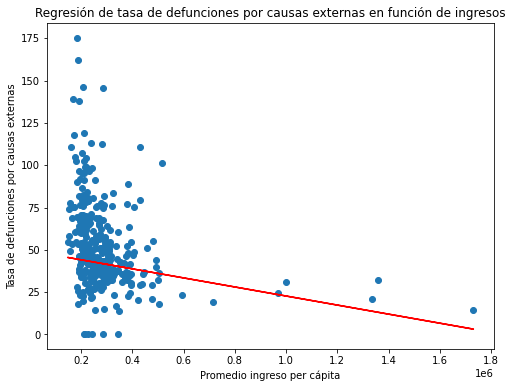

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data_total['ingreso'], data_total['tasa_def'], "o", label="Data")
ax.plot(data_total['ingreso'], params4['Intercept']+params4['ingreso']*data_total['ingreso']  , "r-", label="Predicted")
ax.set_ylabel("Tasa de defunciones por causas externas")
ax.set_xlabel("Promedio ingreso per cápita")
ax.set_title("Regresión de tasa de defunciones por causas externas en función de ingresos")


Text(0.5, 1.0, 'Regresión de tasa de defunciones por causas externas en función de ingresos')

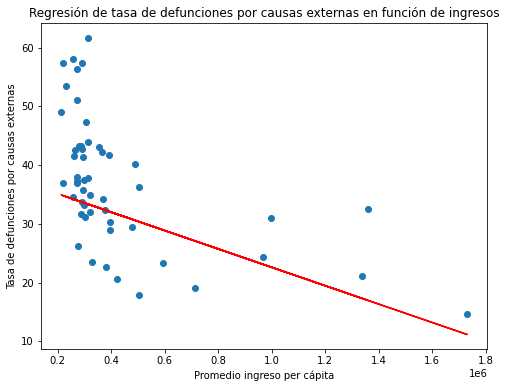

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data_rm['ingreso'], data_rm['tasa_def'], "o", label="Data")
ax.plot(data_rm['ingreso'], params5['Intercept']+params5['ingreso']*data_rm['ingreso']  , "r-", label="Predicted")
ax.set_ylabel("Tasa de defunciones por causas externas")
ax.set_xlabel("Promedio ingreso per cápita")
ax.set_title("Regresión de tasa de defunciones por causas externas en función de ingresos (RM)")


Text(0.5, 1.0, 'Regresión de tasa de defunciones por causas externas en función de ingresos (resto del país)')

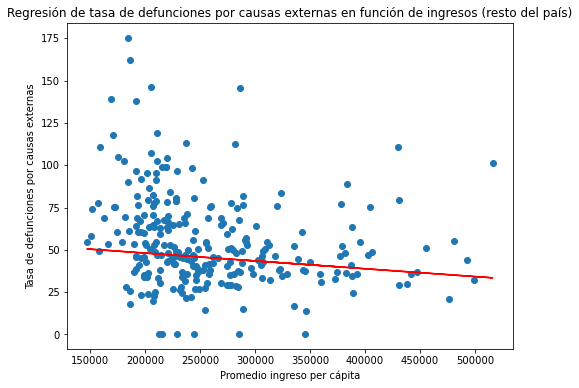

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data_otras['ingreso'], data_otras['tasa_def'], "o", label="Data")
ax.plot(data_otras['ingreso'], params6['Intercept']+params6['ingreso']*data_otras['ingreso']  , "r-", label="Predicted")
ax.set_ylabel("Tasa de defunciones por causas externas")
ax.set_xlabel("Promedio ingreso per cápita")
ax.set_title("Regresión de tasa de defunciones por causas externas en función de ingresos (resto del país)")


In [36]:
data_rm['tasa_def_log'] = np.log(data_rm['tasa_def'])
data_rm['ingreso_log'] = np.log(data_rm['ingreso'])

In [39]:
mod7 = smf.ols(formula='tasa_def_log ~ ingreso_log + prop_rural + etnia + tasa_denuncias', data=data_rm)
res7 = mod7.fit()
params7 = res7.params
print(res7.summary())

                            OLS Regression Results                            
Dep. Variable:           tasa_def_log   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     9.540
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           9.90e-06
Time:                        19:08:20   Log-Likelihood:                 1.2842
No. Observations:                  52   AIC:                             7.432
Df Residuals:                      47   BIC:                             17.19
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.8637      1.162      7.

Text(0.5, 1.0, 'Regresión de tasa de defunciones por causas externas en función de ingresos (RM)')

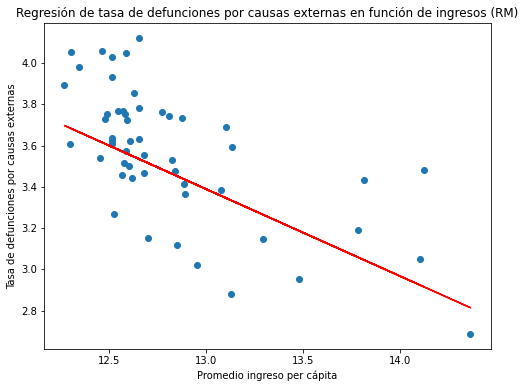

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data_rm['ingreso_log'], data_rm['tasa_def_log'], "o", label="Data")
ax.plot(data_rm['ingreso_log'], params7['Intercept']+params7['ingreso_log']*data_rm['ingreso_log']  , "r-", label="Predicted")
ax.set_ylabel("Tasa de defunciones por causas externas")
ax.set_xlabel("Promedio ingreso per cápita")
ax.set_title("Regresión de tasa de defunciones por causas externas en función de ingresos (RM)\nTransformación logarítmica")


In [45]:
# base code
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance 
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty. 
        Please test the code one your end before using.
    """

    def __init__(self, 
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]): 
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")     

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()
        
        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict, 
            y=self.residual, 
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, 
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i, 
                xy=(self.y_predict[i], self.residual[i]), 
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()
        
        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i, 
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]), 
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax
  
    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict, 
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, 
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i, 
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]), 
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage, 
            self.residual_norm, 
            alpha=0.5);
        
        sns.regplot(
            x=self.leverage, 
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i, 
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')
        
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the 
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))
        

    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams 
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

In [47]:
cls = Linear_Reg_Diagnostic(res7)

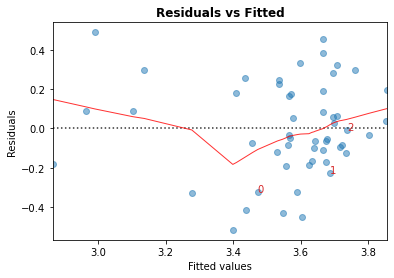

In [48]:
cls.residual_plot();